In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read data from a csv file and put it in a dataframe name 'bos1'
bos1 = pd.read_csv('BostonHousing.csv')
print(bos1)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [2]:
bos1.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# assign data columns to 'input features' x and 'output feature' y
x = bos1.iloc[:,0:13]
y = bos1["medv"]

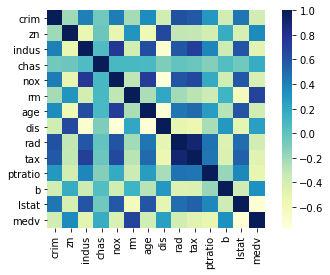

In [4]:
#check correlation

#librarry to establish correlation
import seaborn as sns

#creating a correlation matrix
correlations = bos1.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

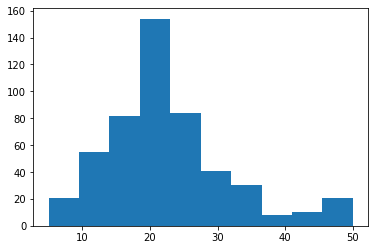

In [5]:
#plot histogram of house prices 'medv'
plt.hist(bos1['medv'])

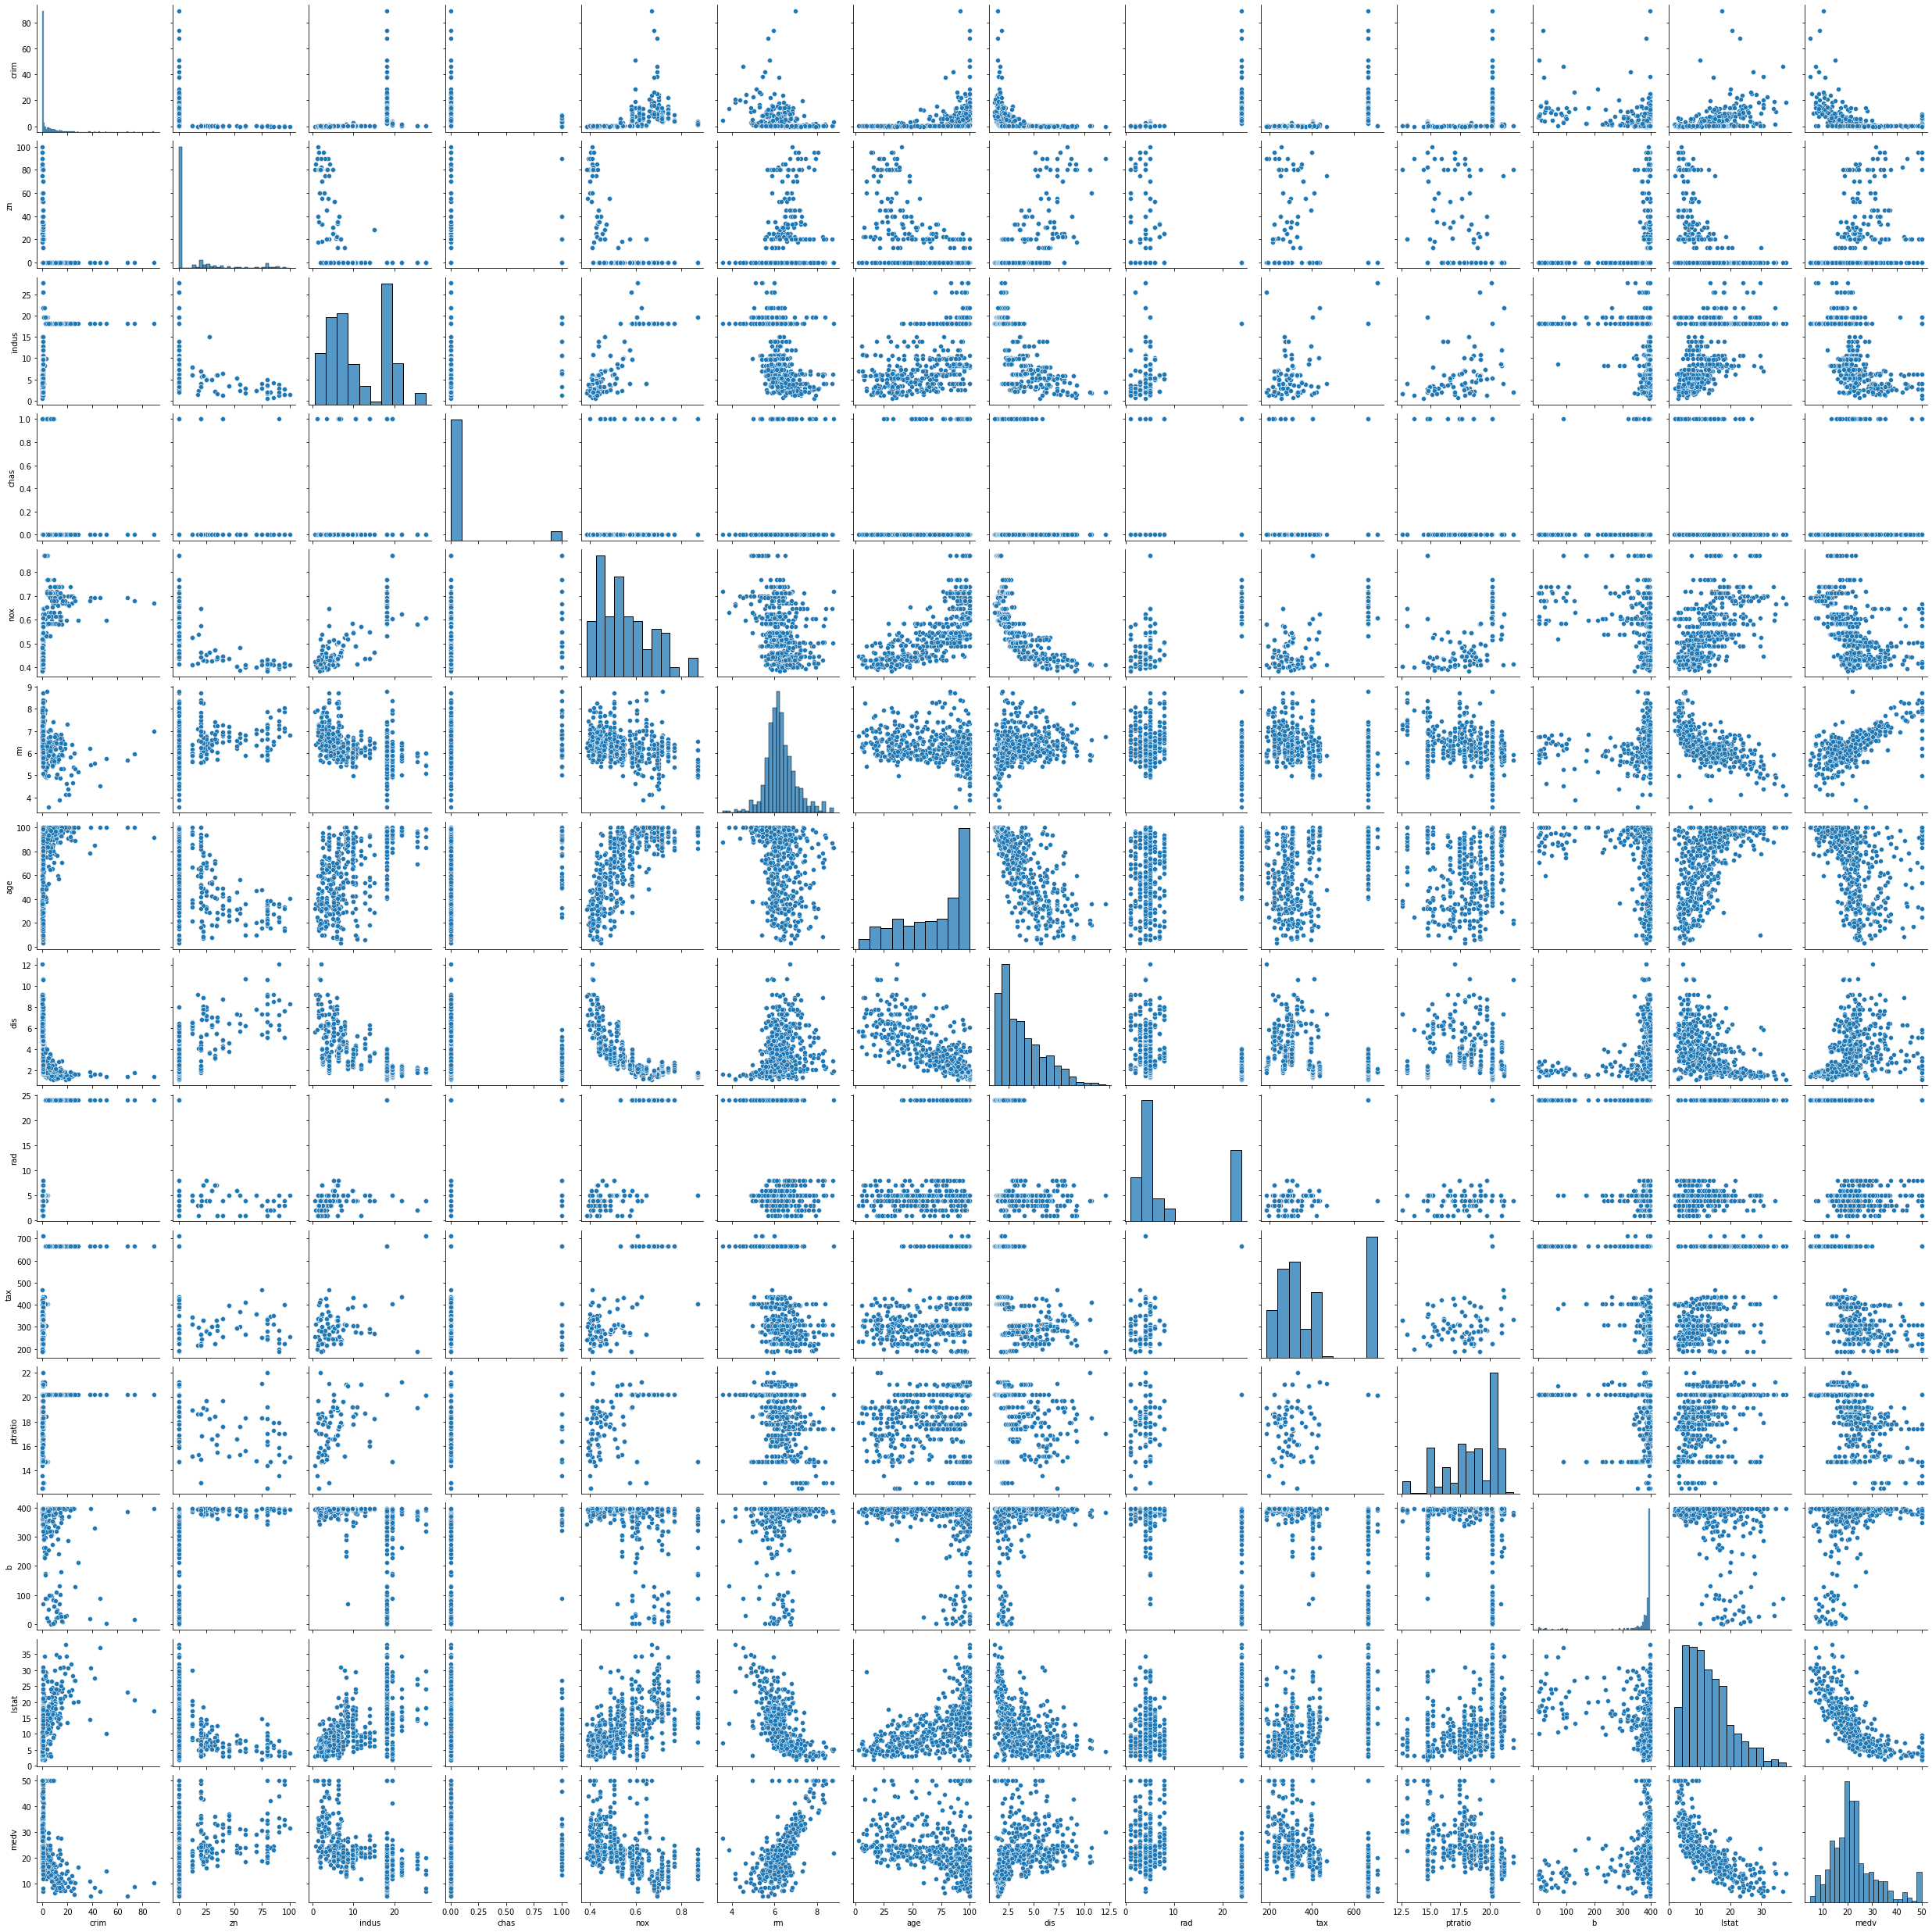

In [6]:
sns.pairplot(bos1)

### The Variance Inflation Factor (VIF) is a measure used to detect the presence of multicollinearity in a multiple regression model. Multicollinearity occurs when independent variables in a regression model are highly correlated, which can distort the results of the regression analysis. VIF=1/(1-R^2). VIF=1 means no correlation between the predictor variable and any other predictor variables

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(bos1.values,i) for i in range (bos1.shape[1])]
vif['Features']=bos1.columns
vif
#look at the table and identify variables with highest VIF to be removed from the analysis

,VIF,Features
0,2.131404,crim
1,2.910004,zn
2,14.485874,indus
3,1.176266,chas
4,74.004269,nox
5,136.101743,rm
6,21.398863,age
7,15.430455,dis
8,15.369980,rad
9,61.939713,tax


In [8]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

##### The Mean Squared Error (MSE) measures the average of the squares of the errors—that is, the average squared difference between the observed actual outcomes and the outcomes predicted by the model. 
The R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It is = 1-
SSres  is the sum of squares of residuals (the differences between observed and predicted values).
SStot is the total sum of squares (the differences between observed values and the mean of observed values).

R² = 1: Perfect fit. The model explains all the variability of the response data around its mean.
R² = 0: The model does not explain any of the variability of the response data around its mean(SSres/SStot).


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [10]:
pred_y = lm.predict(x_test)

MSE= 28.530458765974643


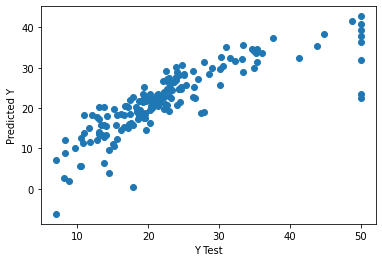

In [11]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
mse = mean_squared_error(y_test, pred_y)
print('MSE=',mse)

## Feature selection and removal based on VIF

In [12]:
#all x variables from bos1 copy to new dataframe df1 
df1=bos1.iloc[:,:13]
print(df1.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [13]:
#Drop variable with high VIF
df1.drop(['nox','tax','rm','ptratio'],axis=1,inplace=True)
print(df1.head())

      crim    zn  indus  chas   age     dis  rad       b  lstat
0  0.00632  18.0   2.31     0  65.2  4.0900    1  396.90   4.98
1  0.02731   0.0   7.07     0  78.9  4.9671    2  396.90   9.14
2  0.02729   0.0   7.07     0  61.1  4.9671    2  392.83   4.03
3  0.03237   0.0   2.18     0  45.8  6.0622    3  394.63   2.94
4  0.06905   0.0   2.18     0  54.2  6.0622    3  396.90   5.33


MSE= 35.63002402955825


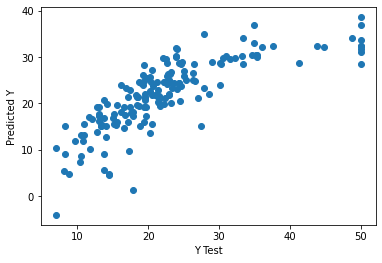

In [14]:
#use new data frame df1 of downselected x variables to dothe prediction
x = df1
y = bos1.medv
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)
model = lm.fit(x_train,y_train)
pred_y = lm.predict(x_test)
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
mse = mean_squared_error(y_test, pred_y)
print('MSE=',mse)

## review the model

In [15]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'age', 'dis', 'rad', 'b', 'lstat'], dtype='object')

In [16]:
lm.coef_

array([-1.33113914e-01,  8.91812626e-02, -3.33720200e-01,  1.67822783e+00,
       -3.23583446e-04, -1.85756305e+00,  3.75736984e-02,  7.67368807e-03,
       -8.14222238e-01])

In [17]:
lm.intercept_

39.69743298238491

In [18]:
lm.score(x_test,y_test) #coefficient of determination R^2

0.6199215073443334

In [19]:
lm.score(x_train,y_train)

0.6390649479066903

In [20]:
from sklearn import metrics
metrics.mean_squared_error(y_test,pred_y)

35.63002402955825